<a href="https://colab.research.google.com/github/muu86/ml_study/blob/main/%EA%B5%AC%EA%B0%84_%EB%B6%84%ED%95%A0%EA%B3%BC_%EB%8B%A4%ED%95%AD%EC%8B%9D_%EC%B6%94%EA%B0%80_%EA%B8%B0%EB%B2%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
!pip install mglearn

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import mglearn

import matplotlib.pyplot as plt
import numpy as np

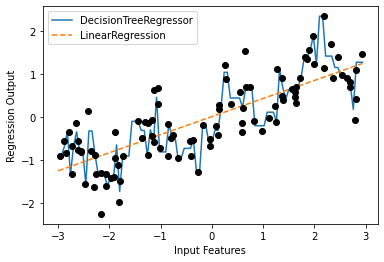

In [14]:
X, y = mglearn.datasets.make_wave(n_samples=100)
line = np.linspace(-3, 3, 100, endpoint=False).reshape(-1, 1)

reg = DecisionTreeRegressor(min_samples_split=3).fit(X, y)
plt.plot(line, reg.predict(line), label="DecisionTreeRegressor")

reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line),'--',label="LinearRegression")

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression Output")
plt.xlabel("Input Features")
plt.legend(loc='best')
plt.show()

## 구간 분할(bining)이란

모든 데이터를 한 번에 훈련하고 예측하는 것이 아닌, 구간을 만들고, 구간에 대한 정보를 추가해 주는 것


In [15]:
# 구간 데이터 만들기
bins = np.linspace(-3, 3, 11)
print('구간 정보 : {}'.format(bins))

구간 정보 : [-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]


구간을 생성했으니, 데이터 포인트가 어느 구간(bins)에 속하는 지  구해야 한다.
- np.digitize()

In [16]:
which_bin = np.digitize(X, bins=bins)
print('데이터 포인트 : \n', X[:5])
print('데이터 포인트의 소속 구간 : \n', which_bin[:5])

데이터 포인트 : 
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]
데이터 포인트의 소속 구간 : 
 [[ 4]
 [10]
 [ 8]
 [ 6]
 [ 2]]


In [17]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False) # 희소 행렬 사용 X

# 구간 데이터는 카테고리 데이터입니다. 따라서 One Hot Encoding 을 수행합니다.
X_binned = encoder.fit_transform(which_bin)

print(X_binned)

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0.

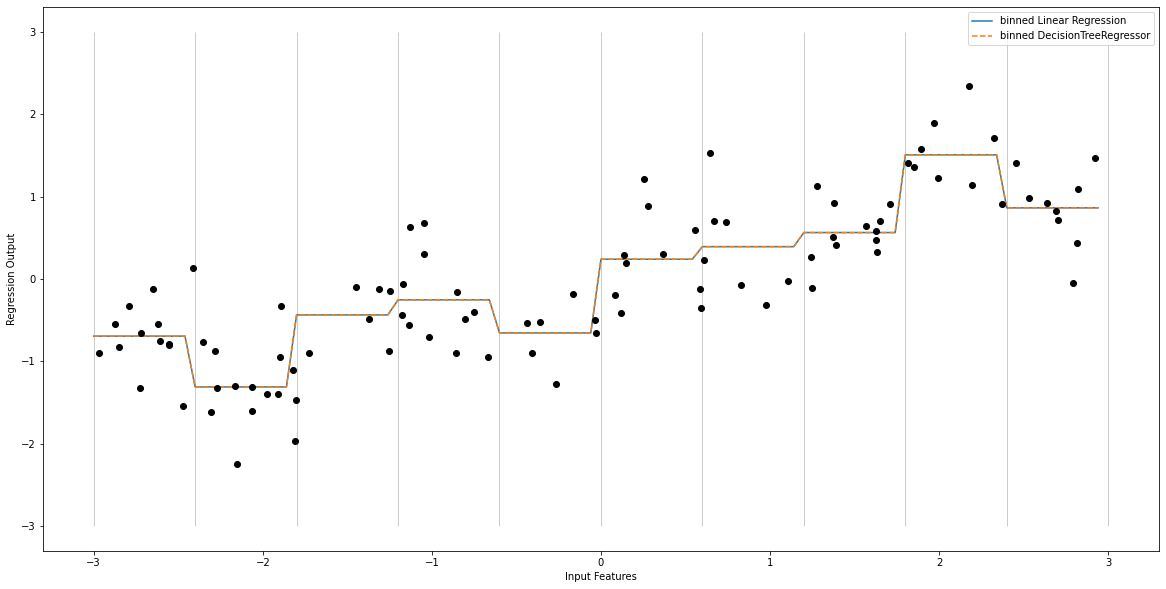

In [21]:
line_binned = encoder.transform(np.digitize(line, bins=bins))

plt.figure(figsize=(20, 10))
reg = LinearRegression().fit(X_binned, y) # 소속 구간에 들어있는 타겟 y를 훈련 시킴
plt.plot(line, reg.predict(line_binned), label="binned Linear Regression")

reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), '--', label='binned DecisionTreeRegressor')

plt.plot(X[:, 0], y, 'o', c='k')


# 구간데이터 수직선 그리기
plt.vlines(bins, -3, 3, linewidth=1, alpha=.2)
plt.legend(loc='best')
plt.ylabel("Regression Output")
plt.xlabel("Input Features")
plt.show()

위 수평선이 의미하는 바는 각 구간의 y 평균!

In [22]:
# 상호작용과 다항식
X_combined = np.hstack([X, X_binned]) # 전체 데이터와 구간 데이터를 합쳐요
X_combined.shape

(100, 11)

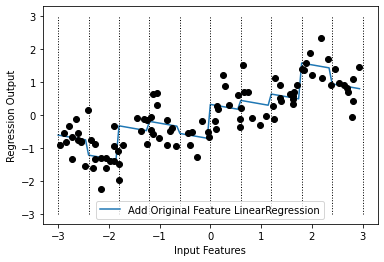

In [23]:
reg = LinearRegression().fit(X_combined, y)

line_combined = np.hstack([line, line_binned])
plt.plot(line, reg.predict(line_combined), label="Add Original Feature LinearRegression")

for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k', linewidth=1) #x축은 각 구간(bin, bin), y축은 -3 부터 3까지 표현

plt.legend(loc='best')
plt.ylabel("Regression Output")
plt.xlabel("Input Features")
plt.plot(X[:, 0], y, 'o', c='k')
plt.show()

In [24]:
# 상호작용 데이터를 추가하면 어떻게 될까요?
X_product = np.hstack([X_binned, X * X_binned]) # 구간 데이터 및 구간 데이터 * 구간
X_product.shape

(100, 20)

In [25]:
X_product[:2]

array([[ 0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        -0.        , -0.        , -0.        , -0.75275929, -0.        ,
        -0.        , -0.        , -0.        , -0.        , -0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  2.70428584]])

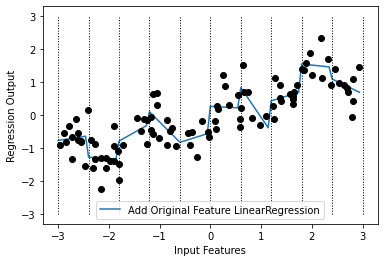

In [26]:
reg = LinearRegression().fit(X_product, y)

line_product = np.hstack([line_binned, line * line_binned]) # 예측해야 할 데이터도 훈련한 데이터와 같이 상호작용을 구함
plt.plot(line, reg.predict(line_product), label="Add Original Feature LinearRegression")

for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k', linewidth=1) #x축은 각 구간(bin, bin), y축은 -3 부터 3까지 표현

plt.legend(loc='best')
plt.ylabel("Regression Output")
plt.xlabel("Input Features")
plt.plot(X[:, 0], y, 'o', c='k')
plt.show()